In [1]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

%matplotlib inline

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

In [16]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype(dtype='float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype(dtype='float32') / 255

In [5]:
train_labels = to_categorical(y=train_labels, num_classes=10)
test_labels = to_categorical(y=test_labels, num_classes=10)

In [6]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784, ), name='fc1'))
model.add(Dense(units=10, activation='softmax', name='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x=train_images, y=train_labels, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.2579 - acc: 0.9248
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.1045 - acc: 0.9683
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0701 - acc: 0.9784
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0509 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0390 - acc: 0.9882


In [9]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

10000/10000 [==============================] - 1s 76us/step


In [10]:
print('test_acc:', test_acc)

test_acc: 0.9808


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
softmax (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


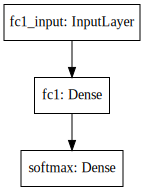

In [36]:
plot_model(model, to_file='minst_model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [42]:
layer = model.get_layer(name='softmax')
layer.output_shape

(None, 10)